# Análise e Classificação de Grãos de Trigo usando Machine Learning

## Introdução
Este projeto visa automatizar a classificação de grãos de trigo utilizando técnicas de machine learning, substituindo o processo manual tradicionalmente realizado em cooperativas agrícolas.

## Objetivo
Desenvolver um modelo de classificação que possa identificar automaticamente três variedades de trigo (Kama, Rosa e Canadian) com base em suas características físicas.

## Dataset
O conjunto de dados contém 210 amostras de grãos de trigo com 7 características físicas diferentes.

In [6]:

# Primeira célula - Importações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Configure o estilo dos gráficos
plt.style.use('seaborn')
sns.set_palette("husl")

# Configurar para exibir gráficos no notebook
%matplotlib inline

/var/folders/7p/r8695pvn0c52cj23pmcpzycm0000gn/T/ipykernel_25127/829392893.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [10]:
# Segunda célula - Carregamento dos dados
# Definir nomes das colunas
colunas = ['Area', 'Perimetro', 'Compacidade', 'Comprimento_Nucleo', 
           'Largura_Nucleo', 'Coeficiente_Assimetria', 'Comprimento_Sulco', 'Classe']

# Carregar dados
dados = pd.read_csv('seeds_dataset.txt', names=colunas, sep='\s+')

# Visualizar primeiras linhas
print("Dimensões do dataset:", dados.shape)
print("\nPrimeiras linhas do dataset:")
display(dados.head())

Dimensões do dataset: (210, 8)

Primeiras linhas do dataset:


,Area,Perimetro,Compacidade,Comprimento_Nucleo,Largura_Nucleo,Coeficiente_Assimetria,Comprimento_Sulco,Classe
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [7]:
# Terceira célula - Estatísticas descritivas
print("Informações do dataset:")
print(dados.info())

print("\nEstatísticas descritivas:")
display(dados.describe())

print("\nVerificando valores ausentes:")
display(dados.isnull().sum())

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area                    210 non-null    float64
 1   Perimetro               210 non-null    float64
 2   Compacidade             210 non-null    float64
 3   Comprimento_Nucleo      210 non-null    float64
 4   Largura_Nucleo          210 non-null    float64
 5   Coeficiente_Assimetria  210 non-null    float64
 6   Comprimento_Sulco       210 non-null    float64
 7   Classe                  210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB
None

Estatísticas descritivas:


,Area,Perimetro,Compacidade,Comprimento_Nucleo,Largura_Nucleo,Coeficiente_Assimetria,Comprimento_Sulco,Classe
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000



Verificando valores ausentes:


Area                      0
Perimetro                 0
Compacidade               0
Comprimento_Nucleo        0
Largura_Nucleo            0
Coeficiente_Assimetria    0
Comprimento_Sulco         0
Classe                    0
dtype: int64

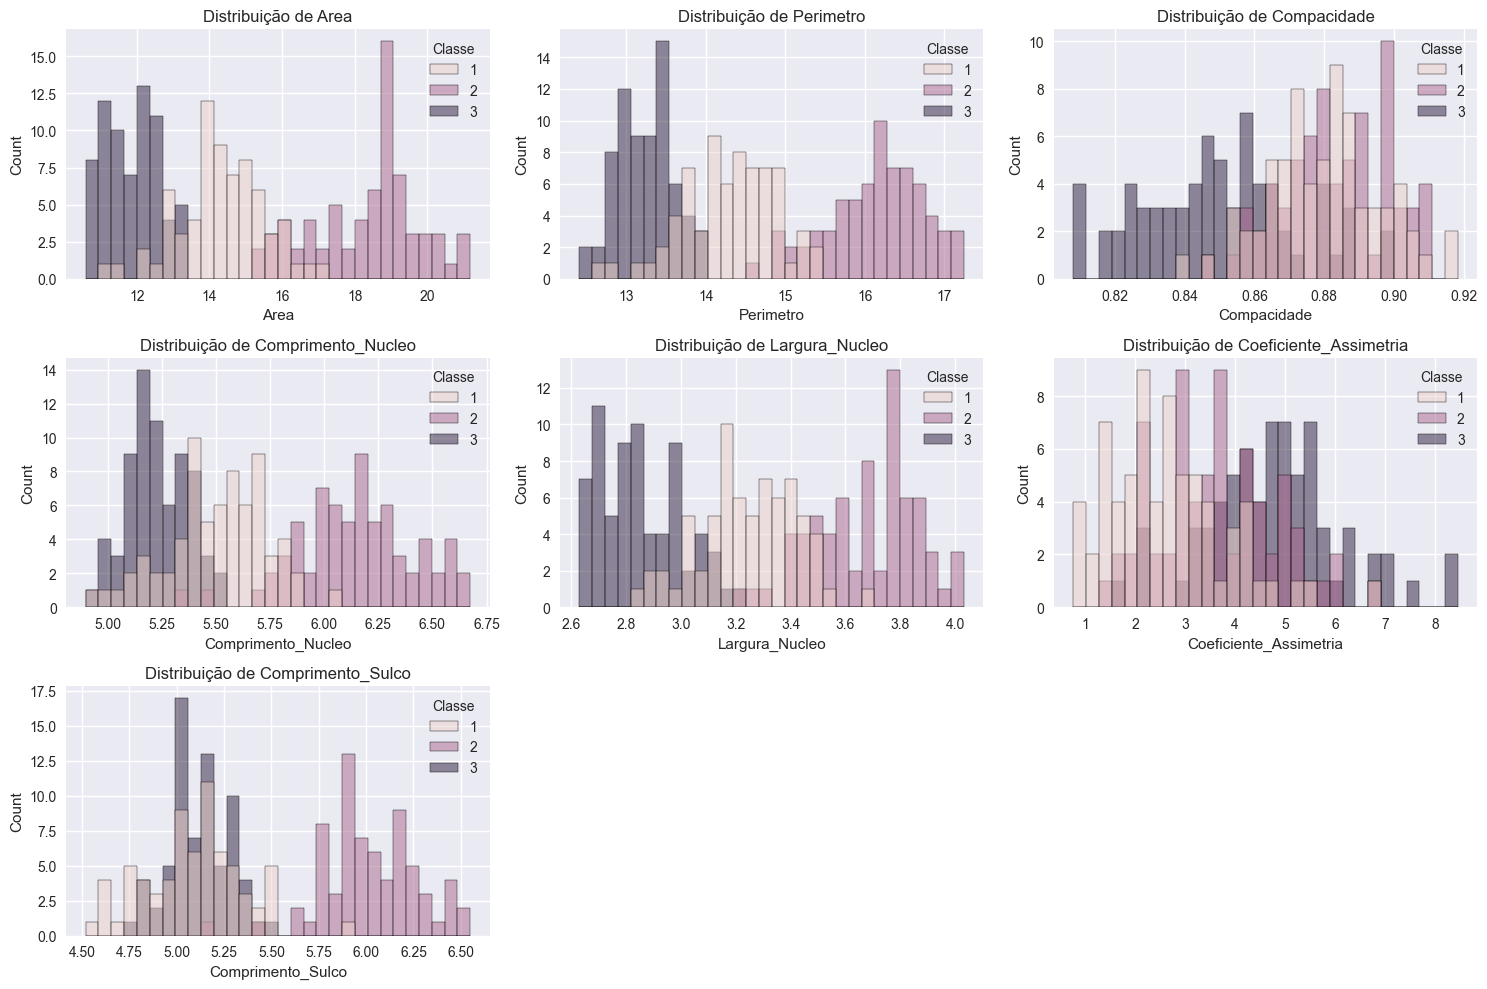

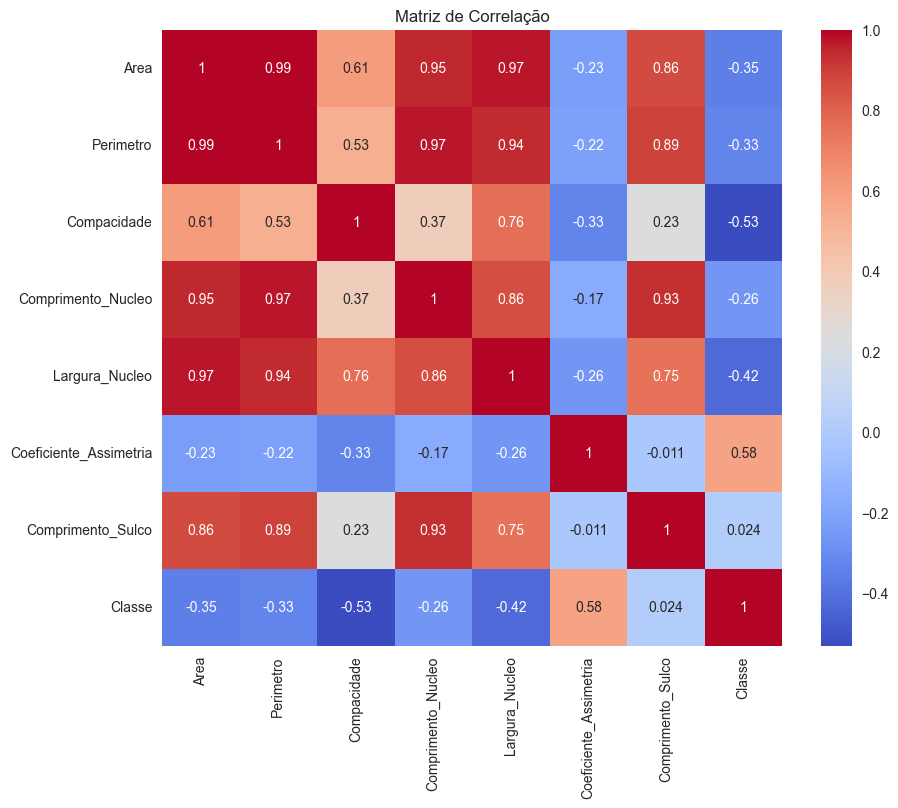

In [11]:
# Quarta célula - Visualizações
# Histogramas
plt.figure(figsize=(15, 10))
for i, coluna in enumerate(dados.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=dados, x=coluna, hue='Classe', bins=30)
    plt.title(f'Distribuição de {coluna}')
plt.tight_layout()
plt.show()

# Matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(dados.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [12]:
# Quinta célula - Preparação dos dados
# Separar features e target
X = dados.drop('Classe', axis=1)
y = dados['Classe']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalonar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Dimensões dos conjuntos de dados:")
print(f"X_train: {X_train_scaled.shape}")
print(f"X_test: {X_test_scaled.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

Dimensões dos conjuntos de dados:
X_train: (147, 7)
X_test: (63, 7)
y_train: (147,)
y_test: (63,)


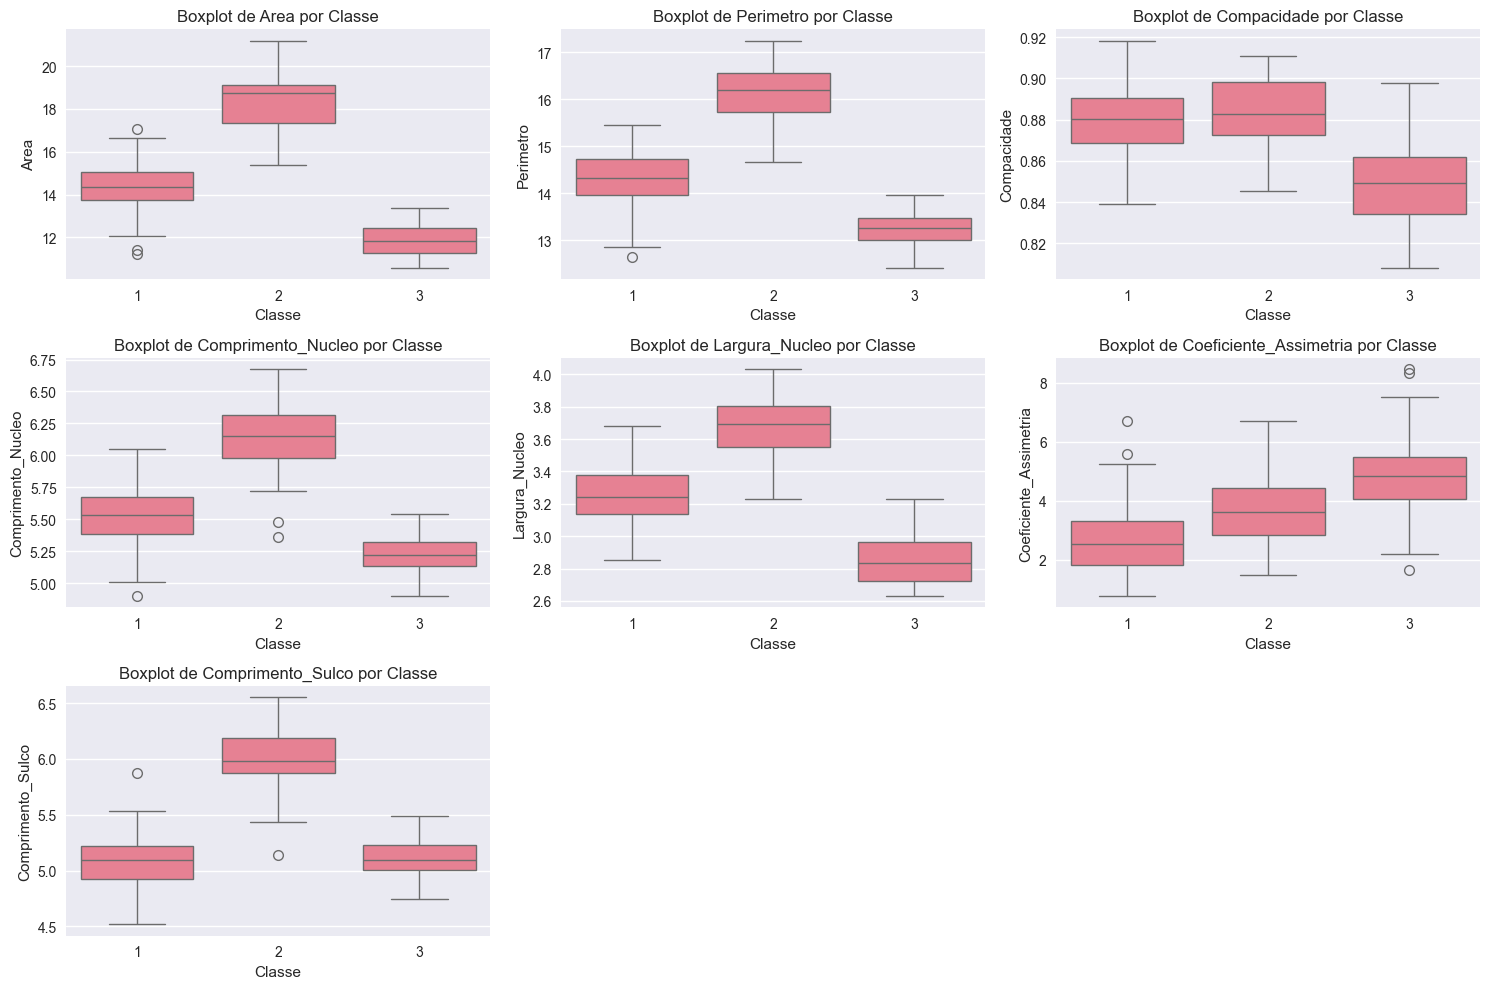

<Figure size 1500x1000 with 0 Axes>

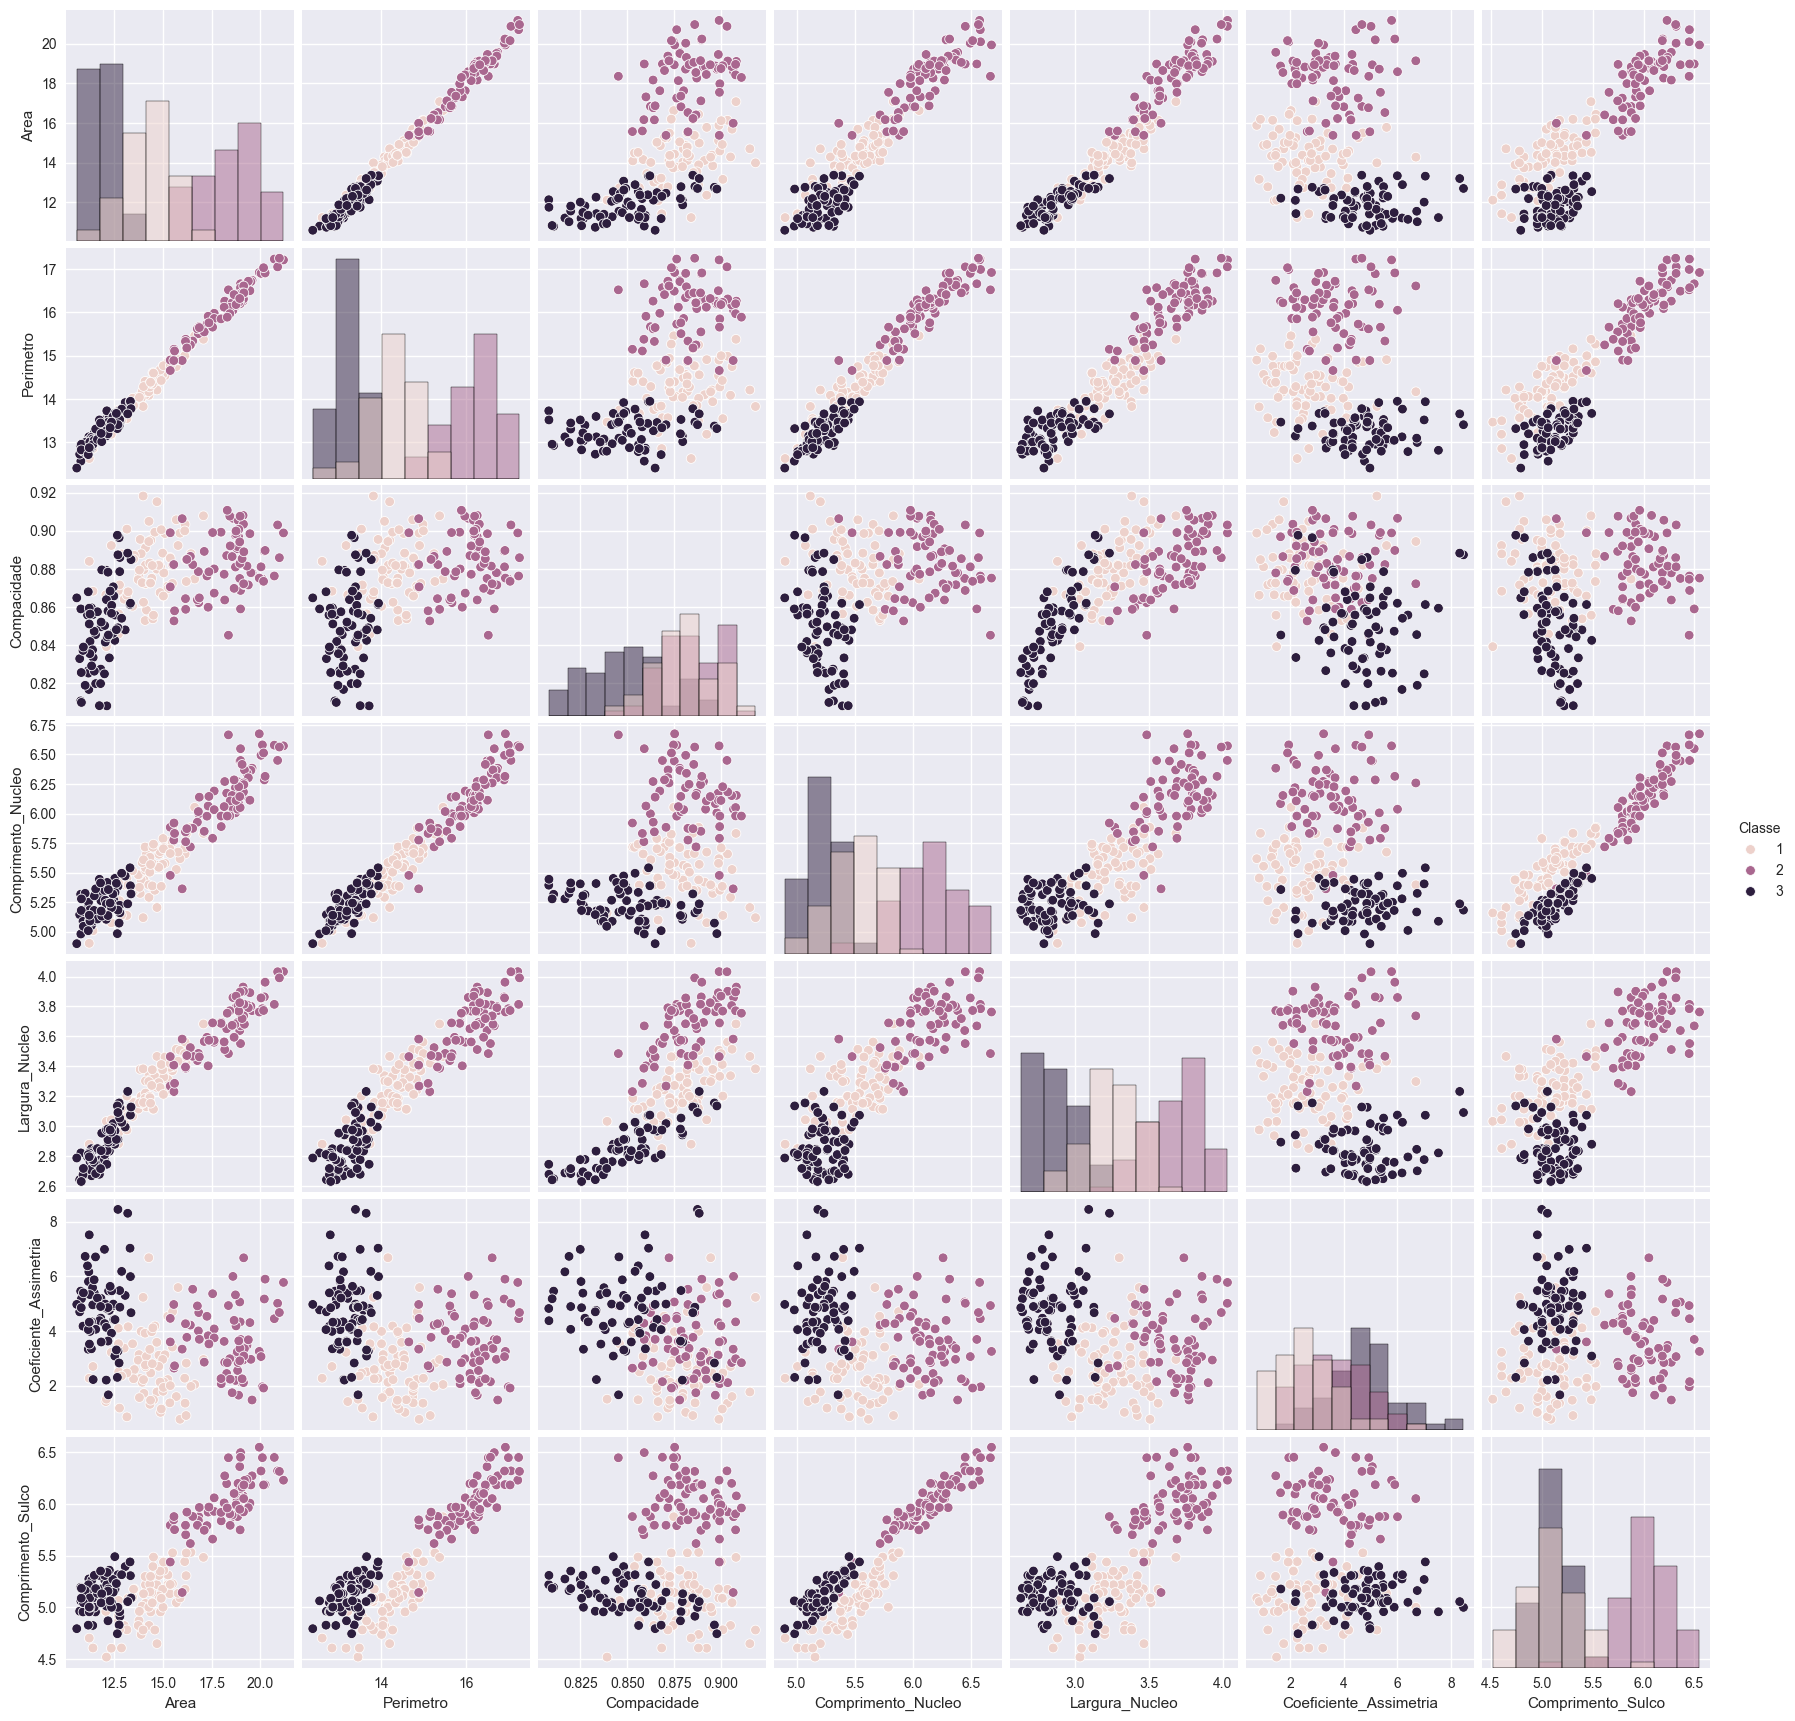

In [17]:
# Quinta célula - Boxplots e gráficos de dispersão
# Boxplots
plt.figure(figsize=(15, 10))
for i, coluna in enumerate(dados.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=dados, x='Classe', y=coluna)
    plt.title(f'Boxplot de {coluna} por Classe')
plt.tight_layout()
plt.show()

# Gráficos de dispersão
plt.figure(figsize=(15, 10))
sns.pairplot(dados, hue='Classe', diag_kind='hist')
plt.show()

In [13]:
# Sexta célula - Importação dos modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# Criar dicionário com os modelos
modelos = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'Regressão Logística': LogisticRegression()
}


Treinando KNN...

Relatório de Classificação - KNN
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        20
           2       1.00      0.95      0.98        21
           3       0.90      0.86      0.88        22

    accuracy                           0.90        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.91      0.90      0.91        63



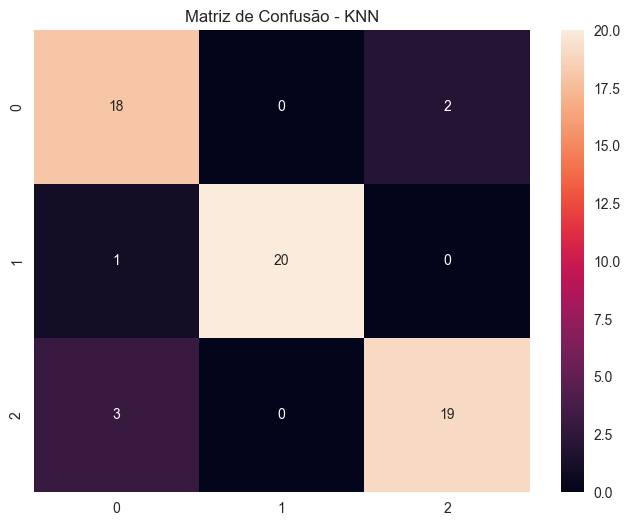


Treinando SVM...

Relatório de Classificação - SVM
              precision    recall  f1-score   support

           1       0.86      0.90      0.88        20
           2       1.00      0.95      0.98        21
           3       0.91      0.91      0.91        22

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63



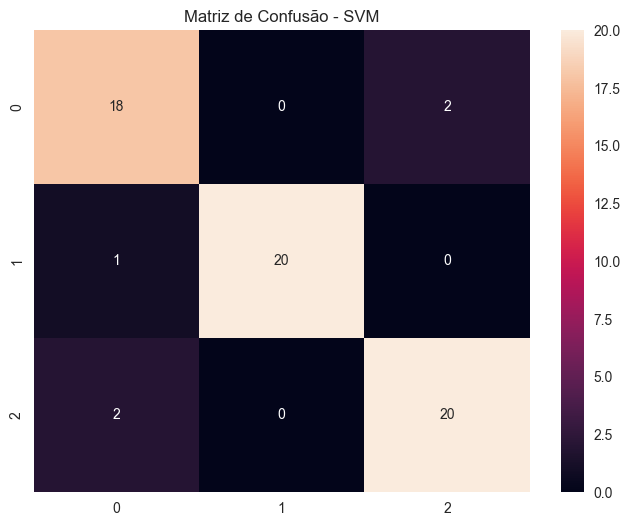


Treinando Random Forest...

Relatório de Classificação - Random Forest
              precision    recall  f1-score   support

           1       0.78      0.90      0.84        20
           2       1.00      0.95      0.98        21
           3       0.90      0.82      0.86        22

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.90      0.89      0.89        63



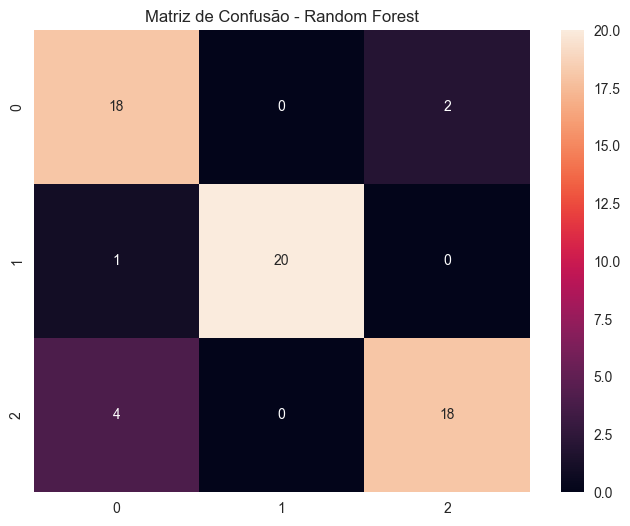


Treinando Naive Bayes...

Relatório de Classificação - Naive Bayes
              precision    recall  f1-score   support

           1       0.80      0.80      0.80        20
           2       0.95      0.90      0.93        21
           3       0.87      0.91      0.89        22

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.87      0.87      0.87        63



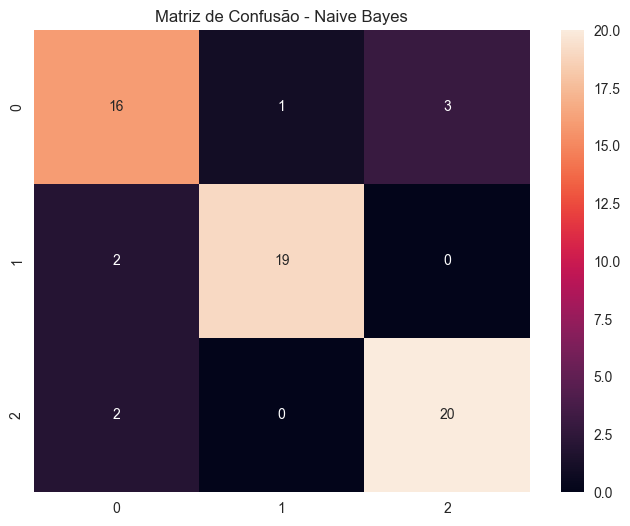


Treinando Regressão Logística...

Relatório de Classificação - Regressão Logística
              precision    recall  f1-score   support

           1       0.85      0.85      0.85        20
           2       1.00      0.95      0.98        21
           3       0.87      0.91      0.89        22

    accuracy                           0.90        63
   macro avg       0.91      0.90      0.90        63
weighted avg       0.91      0.90      0.91        63



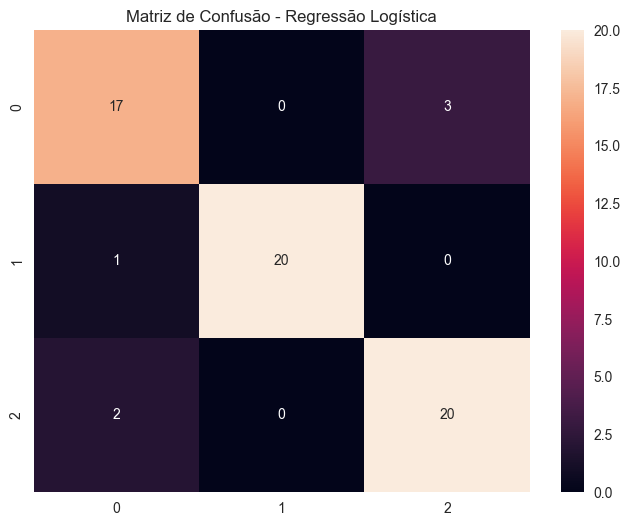

In [14]:
# Sétima célula - Treinamento e avaliação
resultados = {}

for nome, modelo in modelos.items():
    print(f"\nTreinando {nome}...")
    
    # Treinar modelo
    modelo.fit(X_train_scaled, y_train)
    
    # Fazer previsões
    y_pred = modelo.predict(X_test_scaled)
    
    # Avaliar modelo
    print(f"\nRelatório de Classificação - {nome}")
    print(classification_report(y_test, y_pred))
    
    # Matriz de confusão
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.title(f'Matriz de Confusão - {nome}')
    plt.show()
    
    # Guardar acurácia
    resultados[nome] = modelo.score(X_test_scaled, y_test)

In [15]:
# Oitava célula - Grid Search
from sklearn.model_selection import GridSearchCV

# Exemplo para o KNN (ajuste para o melhor modelo encontrado)
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train_scaled, y_train)

print("Melhores parâmetros:")
print(grid_knn.best_params_)
print("\nMelhor score:", grid_knn.best_score_)

Melhores parâmetros:
{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}

Melhor score: 0.9455172413793103


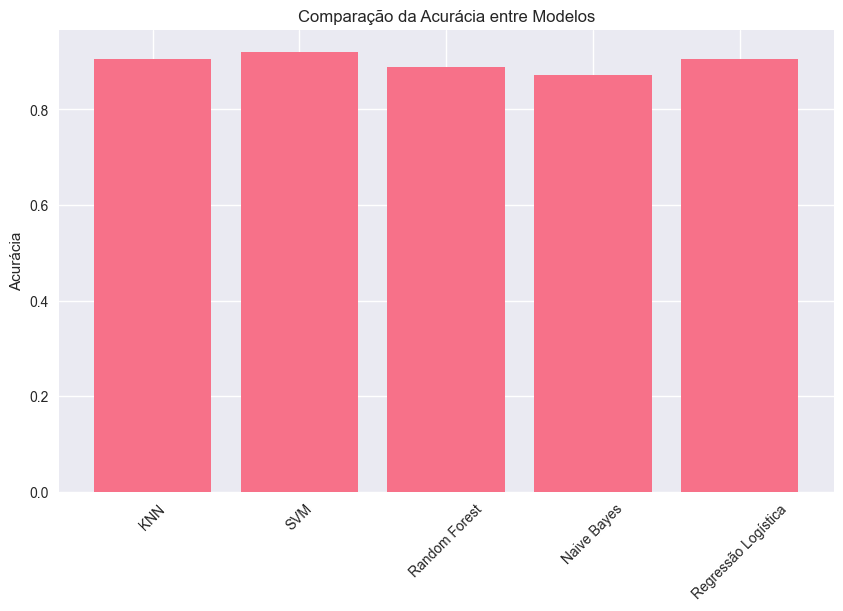

In [16]:
# Nona célula - Comparação final
plt.figure(figsize=(10, 6))
plt.bar(resultados.keys(), resultados.values())
plt.title('Comparação da Acurácia entre Modelos')
plt.xticks(rotation=45)
plt.ylabel('Acurácia')
plt.show()